In [179]:
# Scipy

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [180]:
t_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
t_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

months = np.arange(12) # X-axis data in months

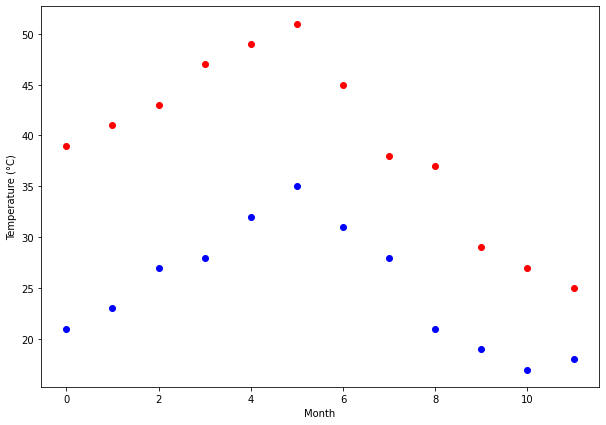

In [200]:
# Plotting the data points

fig = plt.figure(figsize=(10,7))

plt.plot(months, t_max, 'ro')
plt.plot(months, t_min, 'bo')

plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

In [182]:
from scipy.optimize import curve_fit

# Defining mapping function.

def mapping_func(period, avg, ampl, period_offset):
    return (avg + ampl * np.cos(2 * (np.pi / period.max()) * (period + period_offset)))

In [183]:
#Fitting the curve

# For max temperature
res_max, _ = curve_fit(mapping_func, months, t_max)

# For min temperature
res_min, _ = curve_fit(mapping_func, months, t_min)

In [184]:
res_max, res_min

(array([39.88861733, 10.59083165, -4.16629844]),
 array([25.55626462, -7.74472962,  0.93101295]))

In [185]:
# Defining the X-axis points for the curve

days = np.linspace(0,12,365)

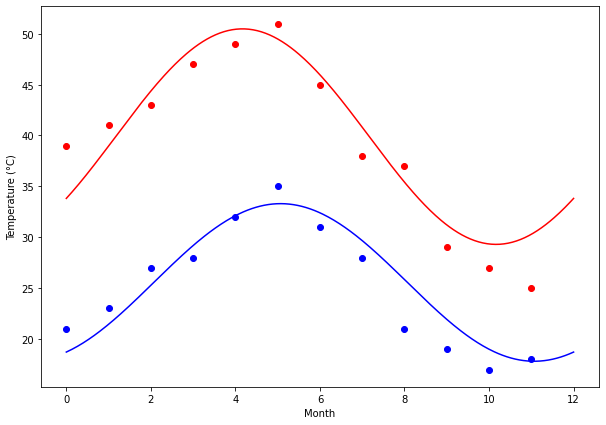

In [199]:
# Plotting the data with the fitted curve

fig = plt.figure(figsize=(10,7))

plt.plot(days, mapping_func(days, *res_max), 'r-')
plt.plot(days, mapping_func(days, *res_min), 'b-')

plt.plot(months, t_max, 'ro')
plt.plot(months, t_min, 'bo')

plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

In [187]:
# Matplotlib

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"

titanic = pd.read_csv(url)

In [188]:
titanic.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [189]:
df1 = pd.DataFrame(titanic.sex.value_counts())
df1

,sex
male,843
female,466


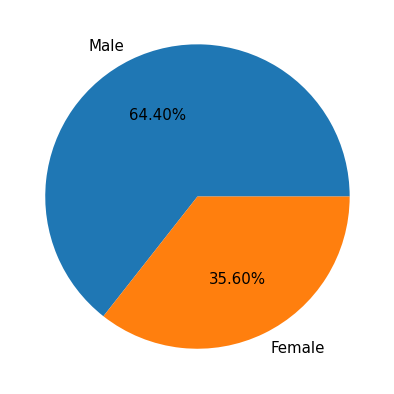

In [213]:
labels = [df1.index[0].title(), df1.index[1].title()]

fig = plt.figure(figsize=(7,7))

plt.pie(df1['sex'], labels=labels, autopct="%.2f%%", textprops = {"fontsize":15})
plt.show()

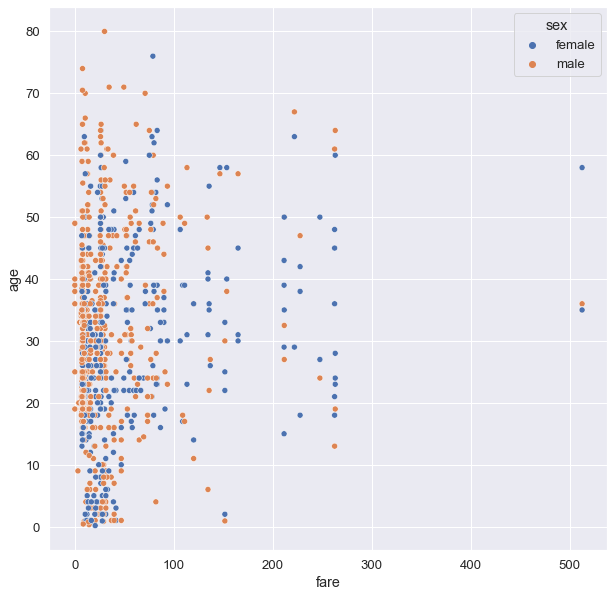

In [225]:
import seaborn as sns

fig = plt.figure(figsize=(10,10))

sns.scatterplot(data=titanic, x='fare', y='age', hue=titanic['sex'])
sns.set(font_scale=1.2)
plt.show()